In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 


In [2]:
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
salary_train.shape

(30161, 14)

In [3]:
salary_test = pd.read_csv("SalaryData_Test.csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
salary_test.shape

(15060, 14)

In [5]:
salary = pd.merge(salary_train,salary_test)

In [6]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5906,45,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
5907,32,Private,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
5908,33,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [11]:
salary.shape

(5910, 14)

In [8]:
salary.value_counts('Salary')

Salary
 <=50K    4909
 >50K     1001
dtype: int64

In [13]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   educationno    5910 non-null   int64 
 4   maritalstatus  5910 non-null   object
 5   occupation     5910 non-null   object
 6   relationship   5910 non-null   object
 7   race           5910 non-null   object
 8   sex            5910 non-null   object
 9   capitalgain    5910 non-null   int64 
 10  capitalloss    5910 non-null   int64 
 11  hoursperweek   5910 non-null   int64 
 12  native         5910 non-null   object
 13  Salary         5910 non-null   object
dtypes: int64(5), object(9)
memory usage: 692.6+ KB


In [14]:
salary.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
salary.education.unique()

array([' HS-grad', ' Some-college', ' Masters', ' Bachelors', ' 11th',
       ' 1st-4th', ' Assoc-acdm', ' Assoc-voc', ' 10th', ' 7th-8th',
       ' 9th', ' 12th', ' 5th-6th', ' Prof-school', ' Doctorate',
       ' Preschool'], dtype=object)

In [16]:
salary.workclass.unique()

array([' Private', ' Local-gov', ' Federal-gov', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov'], dtype=object)

In [17]:
salary.occupation.unique()

array([' Handlers-cleaners', ' Craft-repair', ' Machine-op-inspct',
       ' Transport-moving', ' Other-service', ' Prof-specialty',
       ' Exec-managerial', ' Sales', ' Adm-clerical', ' Tech-support',
       ' Protective-serv', ' Farming-fishing'], dtype=object)

In [22]:
salary.maritalstatus.unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Widowed'], dtype=object)

In [23]:
salary.relationship.unique()

array([' Not-in-family', ' Own-child', ' Husband', ' Wife', ' Unmarried',
       ' Other-relative'], dtype=object)

In [25]:
salary.capitalgain.unique()

array([    0, 15024,  7688,  7298,  5178,  2407, 99999,  3137,  4386,
        5013], dtype=int64)

In [26]:
salary.capitalloss.unique()

array([   0, 2415, 1902, 1887, 1977], dtype=int64)

In [27]:
salary.hoursperweek.unique()

array([40, 50, 20, 60, 45, 25, 30, 38, 55, 10, 35, 65, 24,  8, 15, 36, 43,
       16, 44, 34, 70, 48, 18, 12, 56, 22, 85, 46, 17, 42, 33],
      dtype=int64)

In [31]:
salary.educationno.unique()

array([ 9, 10, 14, 13,  7,  2, 12, 11,  6,  4,  5,  8,  3, 15, 16,  1],
      dtype=int64)

# converting all the columns into numerical 

In [21]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [20]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5906,45,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
5907,32,Private,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
5908,33,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


# droping the maritalstatus relationship race sex column

In [30]:

salary1=salary.drop(['maritalstatus','relationship','race','sex'],axis=1)
salary1

,age,workclass,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Craft-repair,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Craft-repair,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Craft-repair,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Craft-repair,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
5905,61,Private,7th-8th,4,Craft-repair,0,0,40,United-States,<=50K
5906,45,Self-emp-inc,Bachelors,13,Exec-managerial,0,0,45,United-States,>50K
5907,32,Private,Some-college,10,Exec-managerial,0,0,40,United-States,<=50K
5908,33,Private,HS-grad,9,Adm-clerical,0,0,40,United-States,<=50K


In [32]:
salary1['workclass'] = label_encoder.fit_transform(salary1['workclass'])
salary1['education'] = label_encoder.fit_transform(salary1['education'])
salary1['educationno'] = label_encoder.fit_transform(salary1['educationno'])
salary1['native'] = label_encoder.fit_transform(salary1['native'])
salary1['occupation'] = label_encoder.fit_transform(salary1['occupation'])

In [33]:
salary1

,age,workclass,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,2,11,8,4,0,0,40,3,<=50K
1,19,2,11,8,1,0,0,40,3,<=50K
2,19,2,11,8,1,0,0,40,3,<=50K
3,19,2,11,8,1,0,0,40,3,<=50K
4,19,2,11,8,1,0,0,40,3,<=50K
...,...,...,...,...,...,...,...,...,...,...
5905,61,2,5,3,1,0,0,40,3,<=50K
5906,45,3,9,12,2,0,0,45,3,>50K
5907,32,2,15,9,2,0,0,40,3,<=50K
5908,33,2,11,8,0,0,0,40,3,<=50K


# creating the box plot for understanding the data and the distribution

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


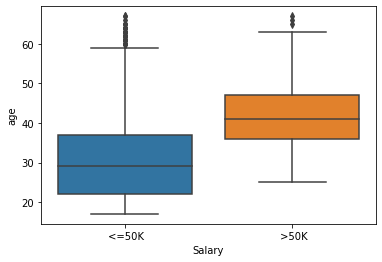

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


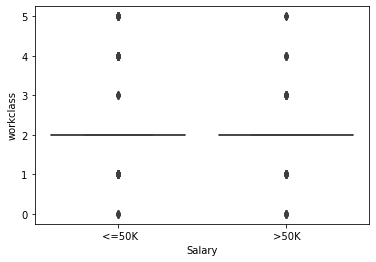

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


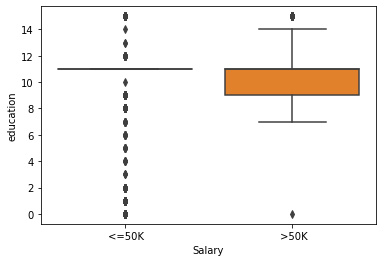

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


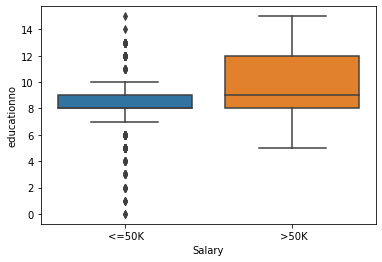

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


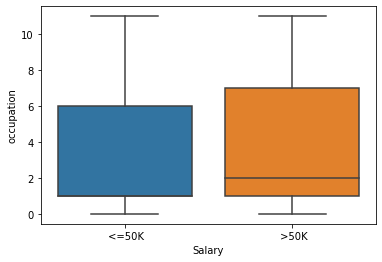

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


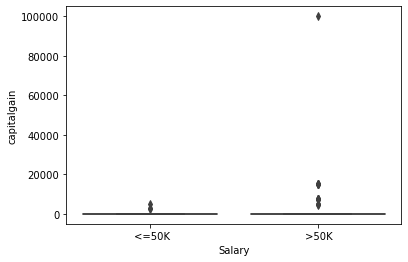

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


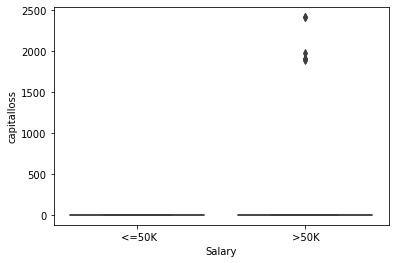

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


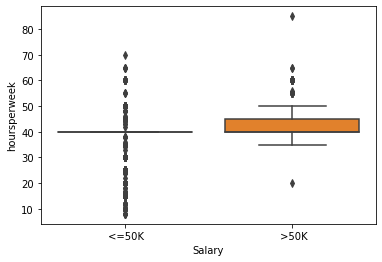

C:\Users\Naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


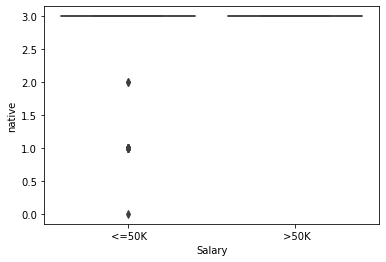

In [35]:
#using for loop 
for i in salary1.columns[:-1]:
    sns.boxplot(salary1['Salary'],salary1[i])
    plt.show()

# splitting the data 

In [39]:
x_train,x_test,y_train,y_test = train_test_split(salary1.iloc[:,:-1],salary1.iloc[:,-1],test_size=0.3,shuffle=True)

# Creating the model

In [40]:
model=GaussianNB()
model = model.fit(x_train,y_train)

In [41]:
y_test_pred = model.predict(x_test)

# Accuracy 

In [42]:
metrics.accuracy_score(y_test,y_test_pred)

0.8347433728144388